# Homework 04

**Alexander Looi**

In [2]:
#################### PLEASE DO NOT MODIFY THIS CELL #####################
import sys, os, string
import math, random
import csv, json
from collections import Counter
# Please do not use other imports in this homework.
# omg no numpy! :^P

def correlation_coefficient(X,Y):
    """Compute the pearson correlation coefficient between two lists of
    numbers X and Y.
    """
    # Please do not modify this function
    
    from numpy import corrcoef
    return float(corrcoef(X,Y)[0,1])

##########################################################################

# Problem 1

In [3]:
def load_data(file_name):
    '''This function takes in a file name as "file_name", reads in the file as a json formated file
    and outputs a diciontary of dictionary. This data loader is specifically formats data for this
    Specific data set. Each row in the Json file is a patient in a "python dictionary" form. So each 
    patient read into python will get their own dictionary entry as a number. Here the first row
    is the patient 1, the second row patient 2, etc.'''
    import json # import the Json package to use
    file = open(file_name, 'r') # open the json file as read only
    data = {} # create a dictionary to store the data. Each data
    # each patient read in gets their own dictionary entry. 
    for p, l in enumerate(file):
        # This loop reads the file line by line entering each line as a dictionary entry.
        data_line = json.loads(l.strip())
        data[p] = data_line
    return data

In [36]:
def list_data(data):
    '''takes data from data loader and spits out individual lists for each variable in a dictionary.
    This dictionary has keys that are the different classes in the json file where the entries in 
    the dictionary are the same order as the original file.'''
    new_data = {} # create a new dictionary
    # loop through all the patients in the data sets
    for l in data.keys():
        # loop through all the variables associated with each patients
        for d in data[l].keys():
            # add each variable type and create a list of all those variables
            try:
                new_data[d].append(data[l][d])
            except KeyError:
                new_data[d] = [data[l][d]]
    return new_data

In [65]:
# calc the mean
def mean(l):
    return sum(l)/len(l)
# calc the std 
def std(l):
    var = (1.0/len(l)*sum(([(float(e) - mean(l))**2.0 for e in l])))**((1.0)/(2.0))
    return var

32.03298588781398


32.032985887813965

In [4]:
import os
print(os.getcwd())
print(os.chdir('/Users/Looi/Google Drive/UVM/Classes/Fall 2017/Data_Science_I/HW04/data'))
file_names = os.listdir()

/Users/Looi/Google Drive/UVM/Classes/Fall 2017/Data_Science_I/HW04
None


In [289]:
# use the load data function here
dia_data = load_data(file_names[0]) # read in data
# create a new table for statistics
data_list = list_data(dia_data)

# this function prints out a short summary stats table
def print_sum_stats(data):
    print('var.'.ljust(7), 'mean'.rjust(10), 'num. zeros'.rjust(10), 'std'.rjust(10), 'len.'.rjust(10))
    print('-'*51)
    for d in data.keys():
        l = data[d]
        num_vals = len(l)
        num_zeros = sum([int(e) == 0 for e in l])
        calc_std = std(l)
        print(d.ljust(7), '{:6.4f}'.format(mean(l)).rjust(10), str(num_zeros).rjust(10), '{:6.4f}'.format(calc_std).rjust(10), str(len(l)).rjust(10))
        
print_sum_stats(data_list)

var.          mean num. zeros        std       len.
---------------------------------------------------
BP         68.8893         35    19.4623        750
BMI        32.0212         10     7.8238        750
PG        120.7813          5    32.0330        750
class       0.3493        488     0.4768        750
SI         79.7480        363   113.3253        750
age        33.1280          0    11.7478        750
NP          3.8640        109     3.3808        750
SFT        20.4587        222    15.9193        750


Here I calculate the standard deviation, mean, and the number zero values that occur in this data set. I looked at the number of times zeros occur because for many of the variables values of zero do not make sense. For example, a BMI, skin fold thickness, or Blood Pressure cannot be zero (unless these are not people with mass or are cadavers in which case I don't how or why we care a corpse has diabetes!). Judging from this it would seem that zero values for most of these variables show instances where there are missing data. The only two classes where zero values do make sense for the data are 'class' and 'NP' (number of times pregnant). It is possible to have been pregnant zero times (as a male I have first hand experience!) and the class can also be zero because this data is represented as binary. 

The blood pressure category is a little curious to me because normally there are two numbers reported in blood pressure, the systolic, and diastolic. Usually, we need both of these numbers to determine if a person has hyptertension. Also the data key does not address which blood pressure type this is. 

In [288]:
# print the raw data into a nice neat table for us to look at to see what other
# weird things that might be in this data set
print('pat.'.ljust(5), ''.join([v.ljust(7) for v in data_list.keys()]))
print('-'*59)
for n, d in enumerate(dia_data.keys()):
    data_print = [dia_data[d][l] for l in dia_data[d].keys()]
    #print(str(n).ljust(5), ''.join([str(v).ljust(7) for v in data_print]))

pat.  BP     BMI    PG     class  SI     age    NP     SFT    
-----------------------------------------------------------


# Problem 2

In [121]:
def flag_missing_values(data, flag_val, var_check):
    '''takes in a dictionary that is parsed by the load_data() function and flags 
    the patient numbers that have missing data in addition, it will flag which 
    variables have missing data for a patient using the int 0 to show a missing value
    other wise 1. This function takes a single value to flag "flag_val", and a list 
    of variables in the data set to check. "var_check" is a list of strings indicating 
    what variables are to be checked given the flag value.'''
    flags = {}
    
    for p in data.keys():
        flags[p] = {}
        for d in data[p].keys():
            if flag_val == data[p][d] and any([d == e for e in var_check]):
                flags[p][d] = 0
            else:
                flags[p][d] = 1
    return flags
# do a quick test to see if results match
val = 0
vars_ch = ['BP', 'BMI', 'PG', 'SI', 'age', 'SFT']
flagged_data = flag_missing_values(dia_data, val, vars_ch)

# compare the flagged dictionary to the unflagged raw data.
print(dia_data[1])
print(flagged_data[1])

{'BP': 66, 'age': 31, 'PG': 85, 'class': 0, 'SI': 0, 'BMI': 26.6, 'NP': 1, 'SFT': 29}


{'BMI': 1, 'BP': 1, 'NP': 1, 'PG': 1, 'SFT': 1, 'SI': 0, 'age': 1, 'class': 1}

In [145]:
def listwise_deletion(data, flag):
    '''This takes in a dictionary of data and conducts list wise deletetion of the
    data set inputted to the function. This function checks to see if any data is
    missing for a patient, if there is data missing the entire entry is removed.'''
    
    data_removed = data.copy()
    
    for d in flag.keys():
        if any([flag[d][e] == 0 for e in flag[d].keys()]):
                del data_removed[d]
    return data_removed

# check that it performs listwise deletion on the flagged data
# a check before we do listwise deletion on the actual raw data
#listwise_deletion(flagged_data)

updated_data = listwise_deletion(dia_data, flagged_data)

In [144]:
# create some summary tables to get a quick view of how the data may have changed
# after removing some of the data points.
list_update_data = list_data(updated_data)
print('data after listwise deletion'.center(51))
print_sum_stats(list_update_data)
print('\n')
print('data before listwise deletion'.center(51))
print_sum_stats(data_list)

            data after listwise deletion           
var.          mean num. zeros        std       len.
---------------------------------------------------
BP         70.5870          0    12.5513        385
BMI        33.0281          0     7.0302        385
PG        122.4156          0    30.7389        385
class       0.3325        257     0.4711        385
SI        155.0623          0   115.5030        385
age        30.8208          0    10.2510        385
NP          3.3169         56     3.2279        385
SFT        29.0468          0    10.5463        385


           data before listwise deletion           
var.          mean num. zeros        std       len.
---------------------------------------------------
BP         68.8893         35    19.4623        750
BMI        32.0212         10     7.8238        750
PG        120.7813          5    32.0330        750
class       0.3493        488     0.4768        750
SI         79.7480        363   113.3253        750
age       

Just looking at these two summary statistics we can see that doing a list wise deletion has removed just under half of the data. Interesting, it would appear that values for some variables for mean and standard deviation have not changed much. To be clear though, the previous statement should be taken with a grain of salt because what may appear a small numerical change could be a significant statistically or biologically. Some variable means like 'SI' appear to have changed pretty significantly (though the standard deviations have not changed much). 

In [158]:
# Test some ways to see if two lists are the same.
a1 = ['a', 'b']
b1 = ['b', 'a']
c1 = []
set(a1) == set(b1)
set(a1) == set(c1)

False

In [185]:
# calculate the correlation_coefficient for all pairwise combinations in the sanitized data set
# print out the values without duplicates

# function to plot the pairwise (PW) correlation coefficients(CC)
def PW_CC(data):
    pot_dups = []
    print('var. 1'.ljust(7), 'var. 2'.ljust(7), 'Corr. Coeff.'.rjust(15))
    print('-'*31)
    for d1 in data.keys():
        for d2 in data.keys():
            # make sure we don't duplicate a corr coeff calculation by
            # checking for duplicates
            dup_check = []
            dup_check = [set(pd) == set([d1,d2]) for pd in pot_dups]

            # if the two variables are not the same and we haven't calculated the
            # opposite version i.e. a vs. b and b vs a.
            if d1 != d2 and any(dup_check) == False:
                # log the comparisons we've already done
                pot_dups.append([d1, d2])
                # calculate the correlation coef and print the result
                cc_val = correlation_coefficient(data[d1], data[d2])
                print(d1.ljust(7), d2.ljust(7), '{:4.3f}'.format(cc_val).rjust(15))
                
PW_CC(data_list)

var. 1  var. 2     Corr. Coeff.
-------------------------------
BP      BMI               0.294
BP      PG                0.153
BP      class             0.064
BP      SI                0.096
BP      age               0.233
BP      NP                0.142
BP      SFT               0.208
BMI     PG                0.225
BMI     class             0.311
BMI     SI                0.194
BMI     age               0.053
BMI     NP                0.029
BMI     SFT               0.384
PG      class             0.473
PG      SI                0.323
PG      age               0.267
PG      NP                0.133
PG      SFT               0.051
class   SI                0.142
class   age               0.235
class   NP                0.227
class   SFT               0.076
SI      age              -0.034
SI      NP               -0.076
SI      SFT               0.440
age     NP                0.548
age     SFT              -0.108
NP      SFT              -0.073


# Problem 3

In [186]:
#################### PLEASE DO NOT MODIFY THIS CELL #####################
import matplotlib.pyplot as plt
#########################################################################

In [230]:
def MMI(data, flag_val, var_check):
    '''Conducts mean marginal imputation on a data set. First, missing values are 
    flagged then the means of the remaining data are computer and used to replace 
    the missing data in the original data file.'''
    MMI_data = data.copy()  
    data_L = list_data(data) # put data in list form
    
    MMI_data_l = data_L.copy()
    
    # calculate the mean for each variable, absent the missing values
    # then add in those values for the missing data
    for v in data_L.keys():
        
        # only replace values that we know have missing data
        if any([v == vc for vc in var_check]):
            
            var_data = [data_L[v][n] for n, e in enumerate(data_L[v]) if e != 0]
            MMI_mean = mean(var_data)
            print(v, MMI_mean) # print the calculated means
            # This only puts the missing values into the list form
            MMI_data_l[v] = [MMI_mean  if e == 0 else data_L[v][n] for n, e in enumerate(data_L[v])]
            # Here we put the missing data back into 
    
    return MMI_data_l


val = 0
vars_ch = ['BP', 'BMI', 'PG', 'SI', 'age', 'SFT']
MMI_data = MMI(dia_data, val, vars_ch)


BP 72.26153846153846
BMI 32.45391891891891
PG 121.59194630872483
SI 154.5503875968992
age 33.128
SFT 29.060606060606062


In [229]:
#list_update_data = list_data(updated_data)
print('data after listwise deletion'.center(51))
print_sum_stats(list_update_data)
print('\n')
print('data before listwise deletion'.center(51))
print_sum_stats(data_list)
print('\n')
print('data after MMI'.center(51))
print_sum_stats(MMI_data)

            data after listwise deletion           
var.          mean num. zeros        std       len.
---------------------------------------------------
BP         70.5870          0    12.5513        385
BMI        33.0281          0     7.0302        385
PG        122.4156          0    30.7389        385
class       0.3325        257     0.4711        385
SI        155.0623          0   115.5030        385
age        30.8208          0    10.2510        385
NP          3.3169         56     3.2279        385
SFT        29.0468          0    10.5463        385


           data before listwise deletion           
var.          mean num. zeros        std       len.
---------------------------------------------------
BP         68.8893         35    19.4623        750
BMI        32.0212         10     7.8238        750
PG        120.7813          5    32.0330        750
class       0.3493        488     0.4768        750
SI         79.7480        363   113.3253        750
age       

In [228]:
# calculate the correlation_coefficient for all pairwise combinations in the sanitized data set
# print out the values without duplicates

# function to plot the pairwise (PW) correlation coefficients(CC)
def PW_CC2(data, data_MMI, data_lwd):
    pot_dups = []
    print('var. 1'.ljust(7), 'var. 2'.ljust(7), 'CC raw'.rjust(15), 'CC l/w del'.rjust(15),'CC w/ imp.'.rjust(15))
    print('-'*63)
    for d1 in data.keys():
        for d2 in data.keys():
            # make sure we don't duplicate a corr coeff calculation by
            # checking for duplicates
            dup_check = []
            dup_check = [set(pd) == set([d1,d2]) for pd in pot_dups]

            # if the two variables are not the same and we haven't calculated the
            # opposite version i.e. a vs. b and b vs a.
            if d1 != d2 and any(dup_check) == False:
                # log the comparisons we've already done
                pot_dups.append([d1, d2])
                # calculate the correlation coef and print the result
                cc_raw = correlation_coefficient(data[d1], data[d2])
                cc_lwd = correlation_coefficient(data_lwd[d1], data_lwd[d2])
                cc_mmi = correlation_coefficient(data_MMI[d1], data_MMI[d2])

                print(d1.ljust(7), d2.ljust(7), '{:4.3f}'.format(cc_raw).rjust(15), '{:4.3f}'.format(cc_lwd).rjust(15), '{:4.3f}'.format(cc_mmi).rjust(15))
# show the data for all combinations of correlation coeffs.               
PW_CC2(data_list, list_update_data, MMI_data)

var. 1  var. 2           CC raw      CC l/w del      CC w/ imp.
---------------------------------------------------------------
BP      BMI               0.294           0.284           0.303
BP      PG                0.153           0.221           0.213
BP      class             0.064           0.166           0.201
BP      SI                0.096           0.076           0.102
BP      age               0.233           0.318           0.303
BP      NP                0.142           0.208           0.215
BP      SFT               0.208           0.192           0.229
BMI     PG                0.225           0.232           0.217
BMI     class             0.311           0.321           0.282
BMI     SI                0.194           0.170           0.230
BMI     age               0.053           0.033           0.074
BMI     NP                0.029           0.027          -0.021
BMI     SFT               0.384           0.539           0.662
PG      class             0.473         

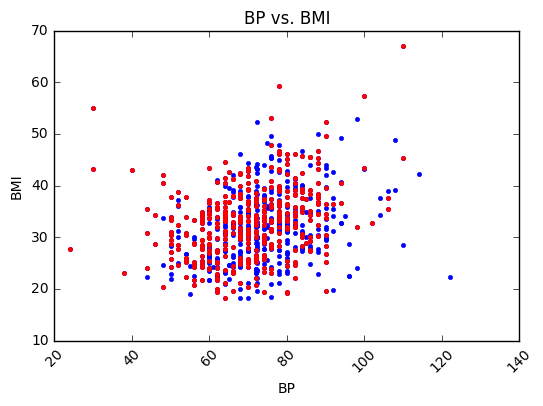

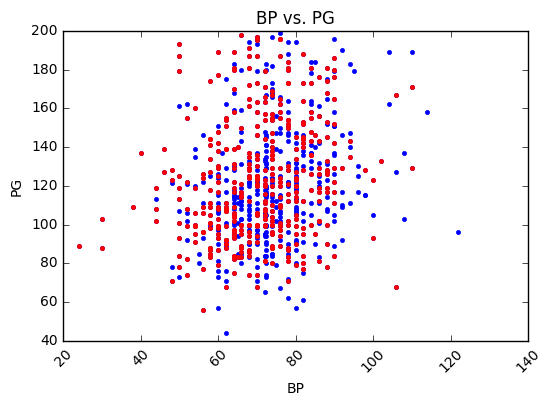

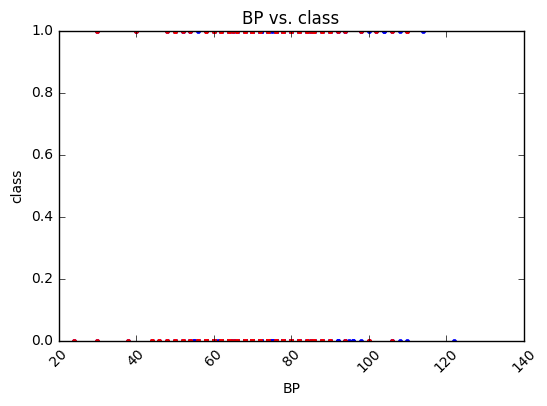

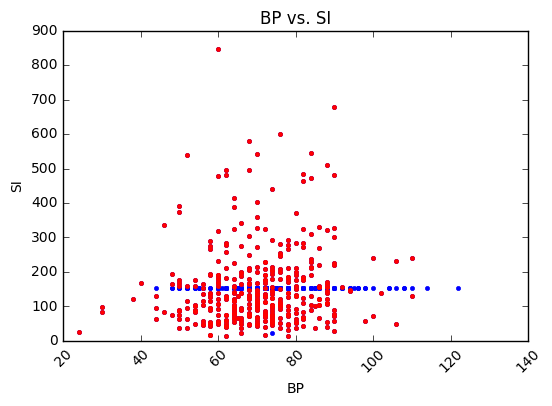

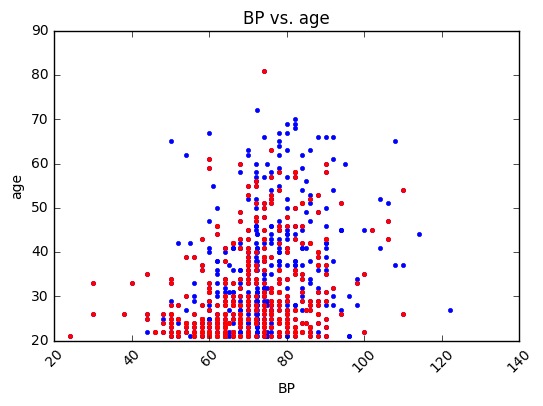

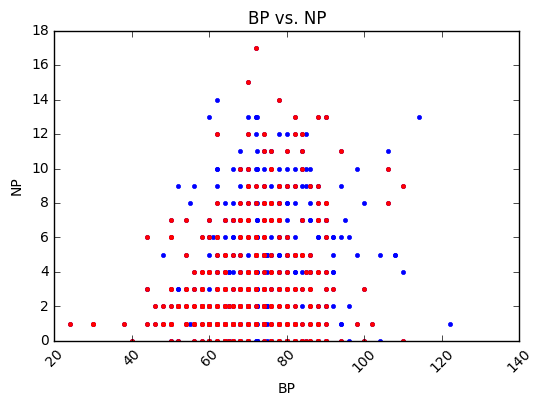

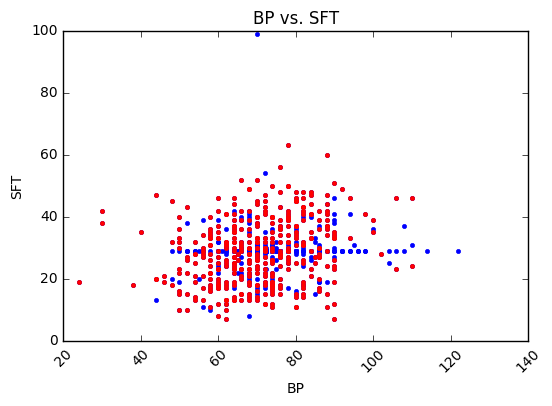

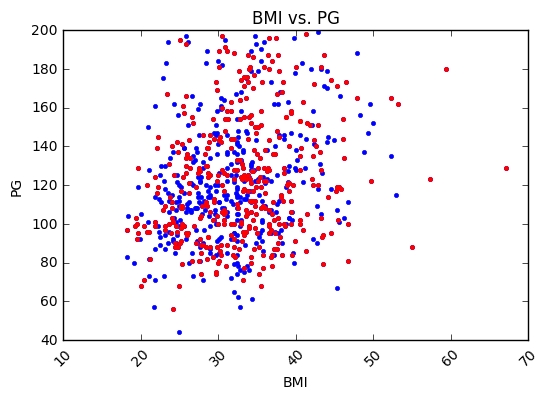

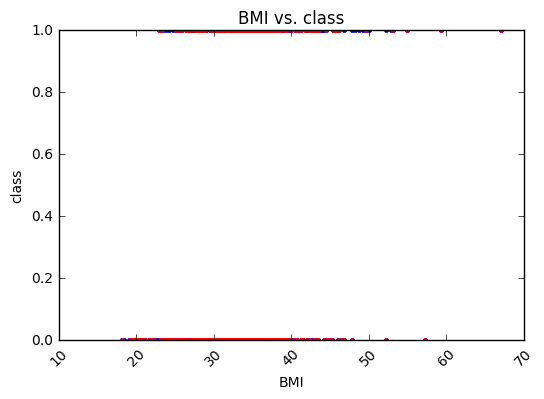

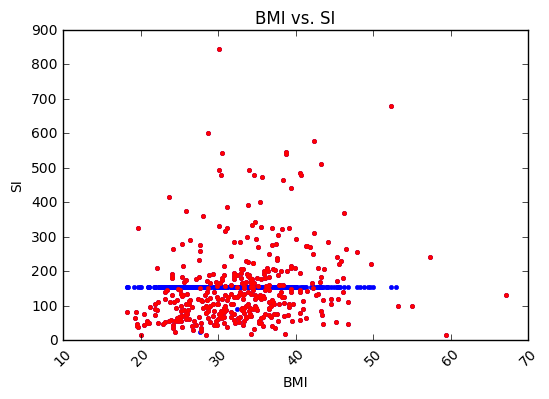

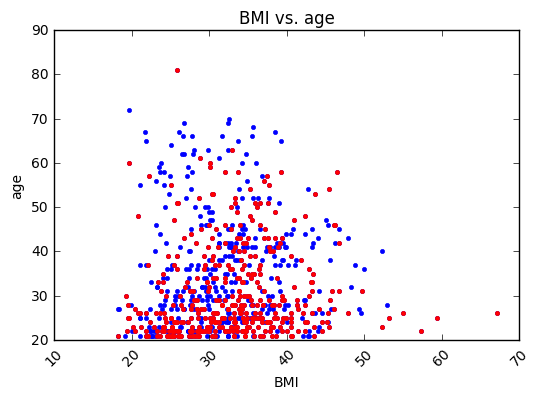

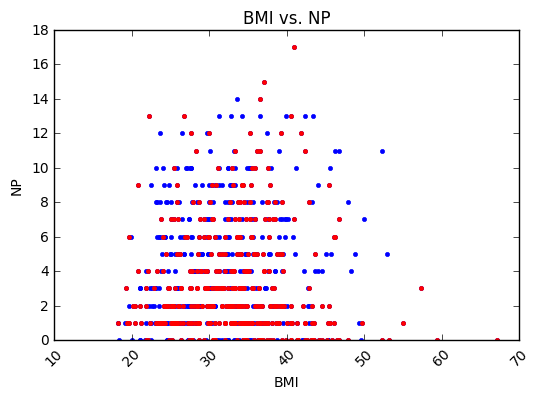

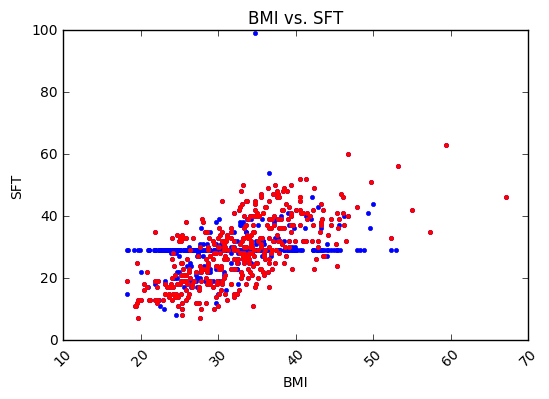

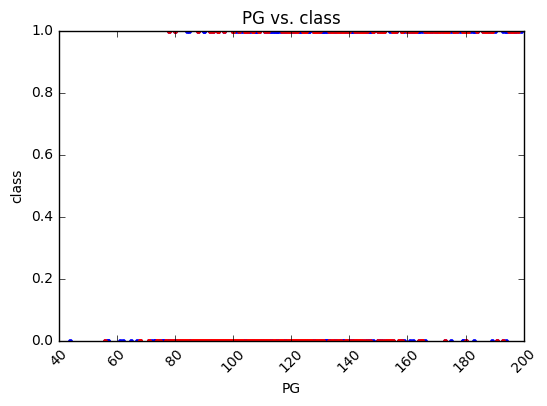

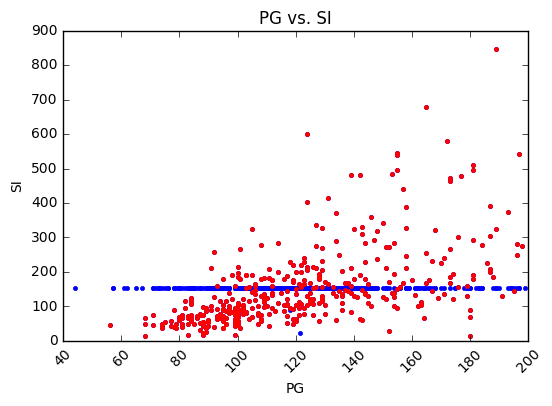

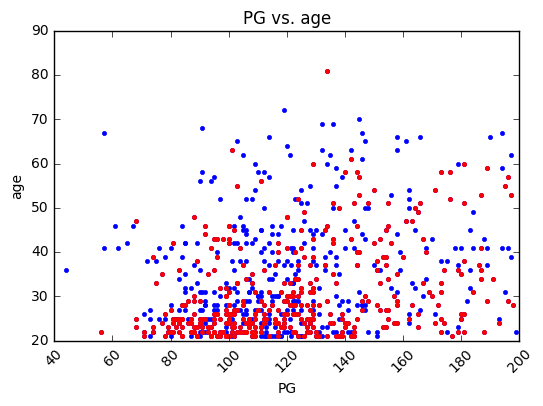

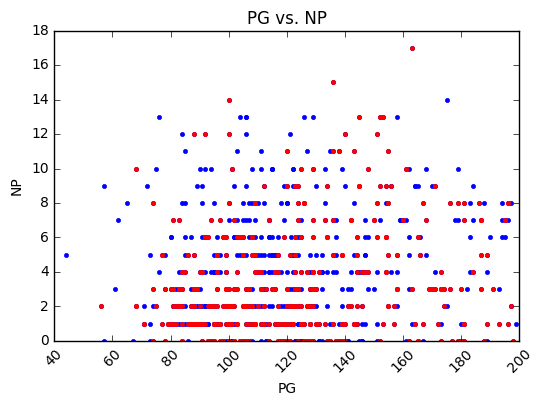

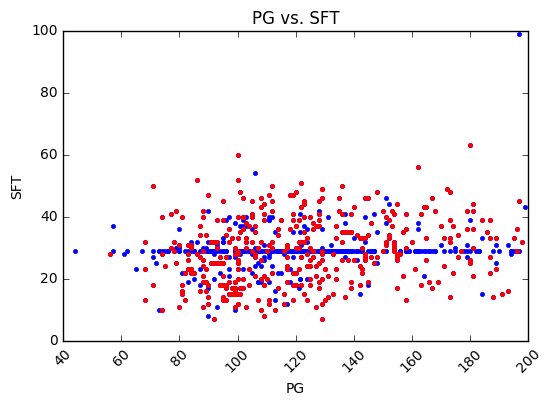

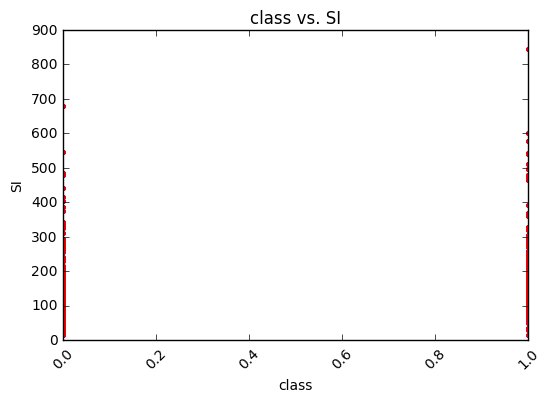

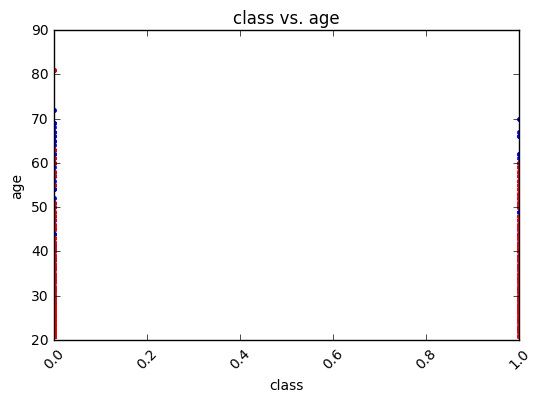

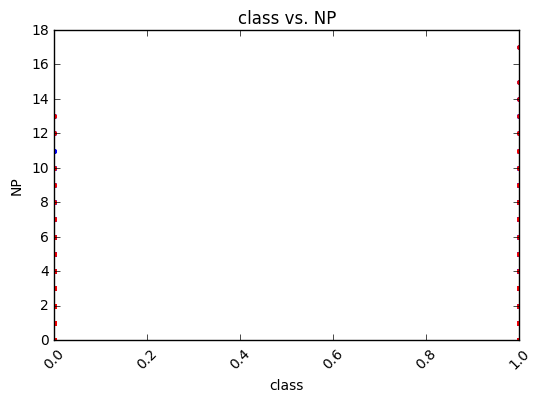

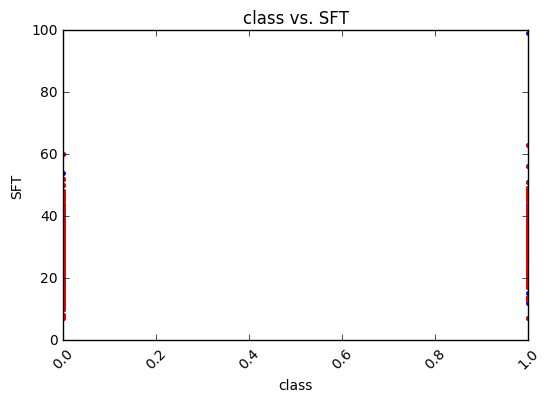

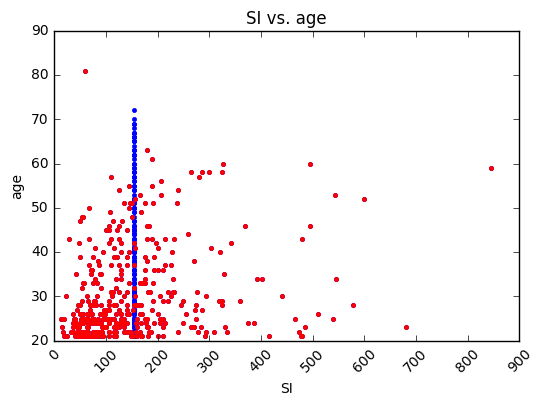

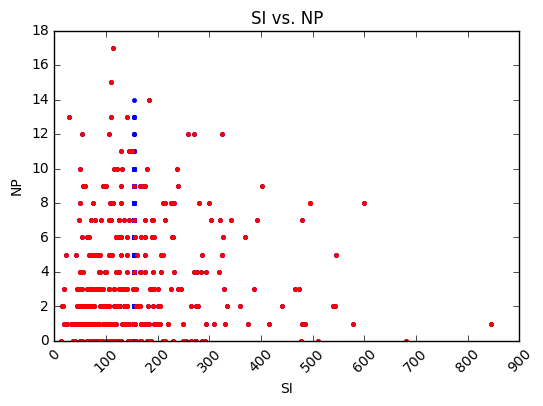

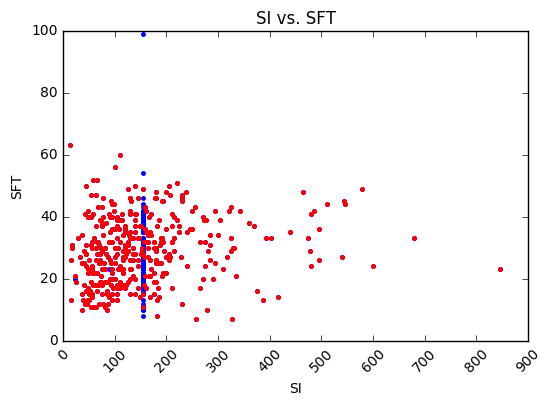

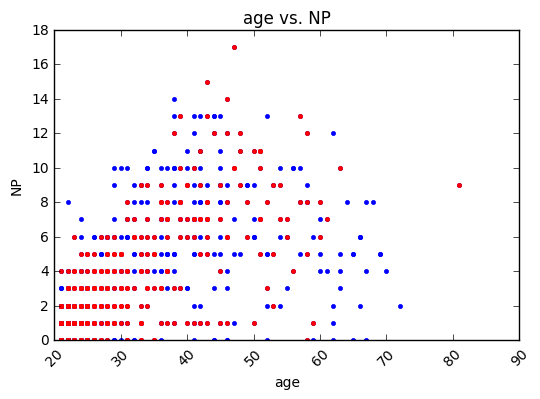

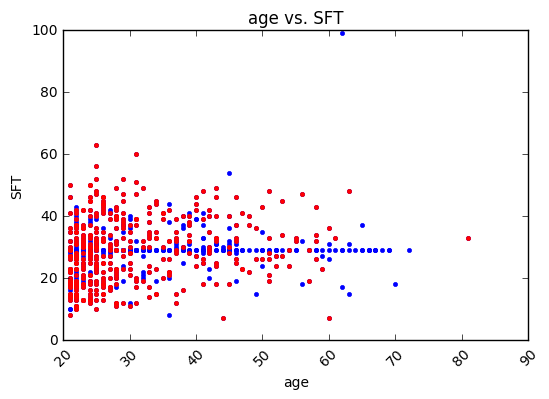

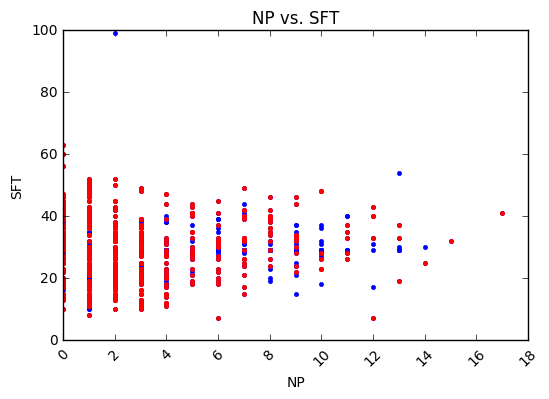

In [291]:
# plot all combinations with different colors of estimated missing data
def Plot_Imputted(data, data_MMI, data_lwd):
    #plt.subplots(14, 2)

    pot_dups = []
    for d1 in data.keys():
        for d2 in data.keys():
            # make sure we don't duplicate a corr coeff calculation by
            # checking for duplicates
            dup_check = []
            dup_check = [set(pd) == set([d1,d2]) for pd in pot_dups]

            # if the two variables are not the same and we haven't calculated the
            # opposite version i.e. a vs. b and b vs a.
            if d1 != d2 and any(dup_check) == False:
                # log the comparisons we've already done
                pot_dups.append([d1, d2])
                                
                plt.plot(data_MMI[d1], data_MMI[d2], '.', color = 'blue')
                titleplt = d1+' vs. '+d2
                plt.title(titleplt)
                plt.xlabel(d1)
                plt.ylabel(d2)
                plt.xticks(rotation=45)
                
                plt.plot(data_lwd[d1], data_lwd[d2], '.', color = 'red')
                plt.title(titleplt)
                plt.show()
                plt.clf()
                
Plot_Imputted(data_list, MMI_data, list_update_data)

In the above plots in red are plotted data using List Wise Deletion, and in blue data with Marginal Mean Imputation are plotted. For some variables list wise deletion appears to remove a lot of good information (i.e. BP, NP, age, PG, BMI). These variables do not appear to be missing too much data but list wist deletion ends up removing a lot of data. The variables that appear to be missing the most data are SI and SFT. The MMI appears to introduce weird artifacts in the data where we get long constant values (from the mean just using an estimation of the mean). Doing any sort of  regression or other analytical technique could be adversely affected by the use of MMI if variables of SFT and SI are included in the analyses. Perhaps a combination of these two metrics could be used in a future analysis. Here MMI could be used to do analysis on variables other than SFT and SI, and we can save list wise deletion in data analysis that involve those two variables. Alternatively we could use another form of immputation to estimate missing values for SI and SFT. 

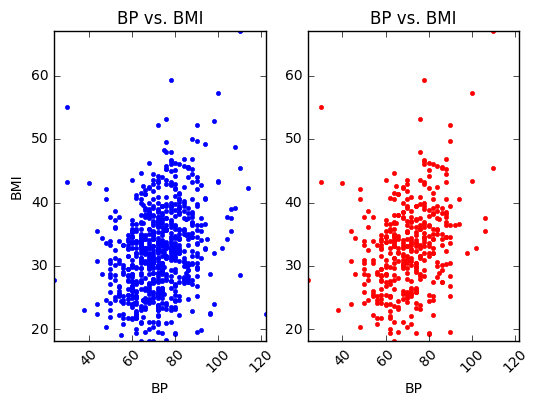

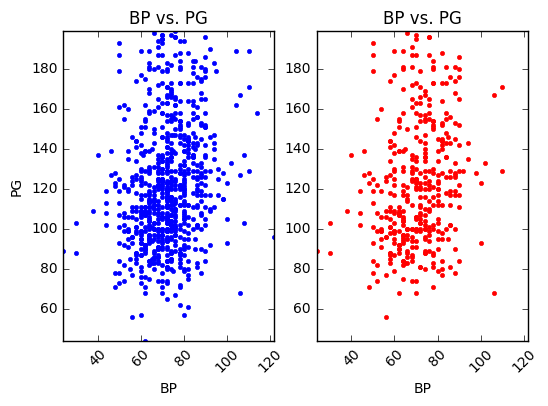

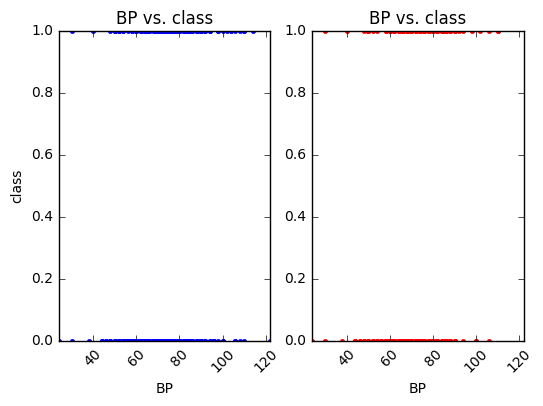

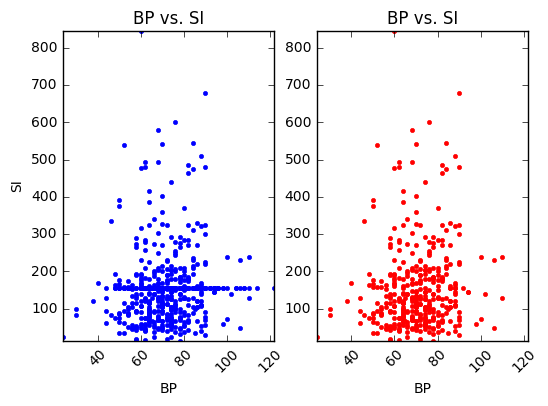

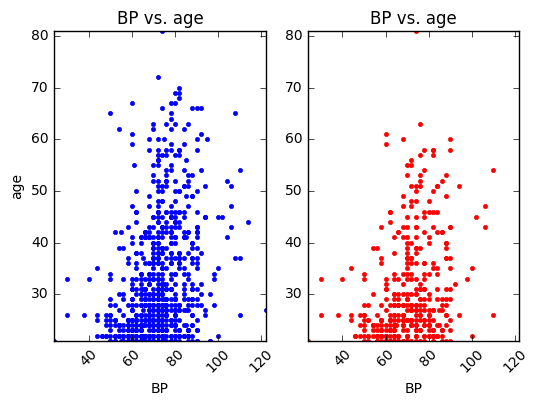

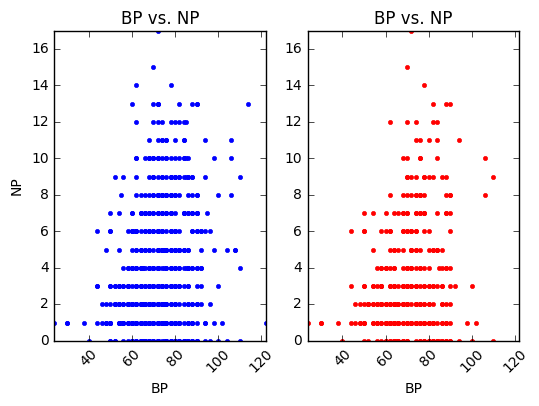

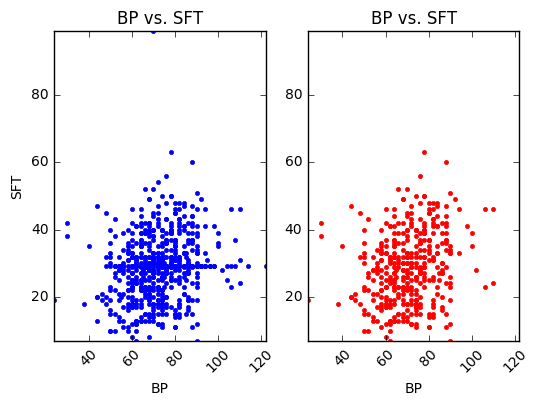

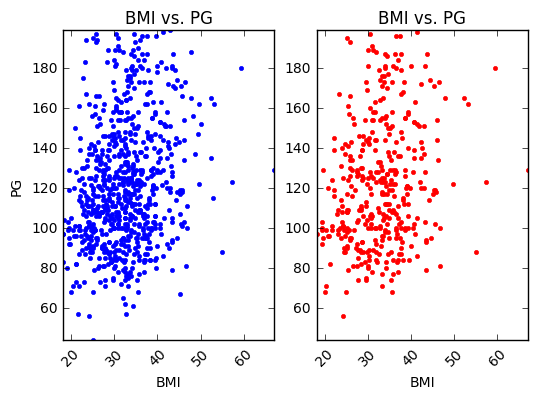

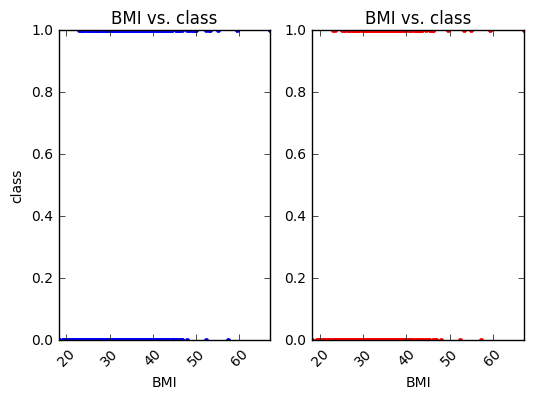

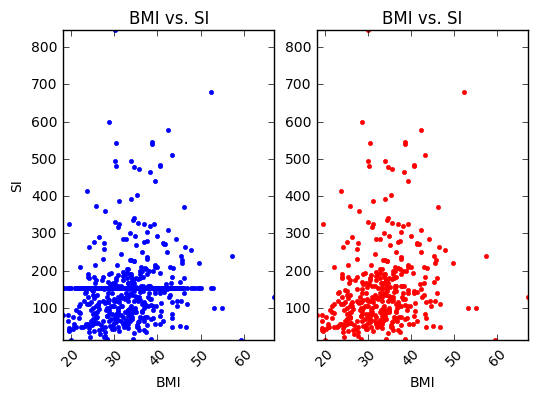

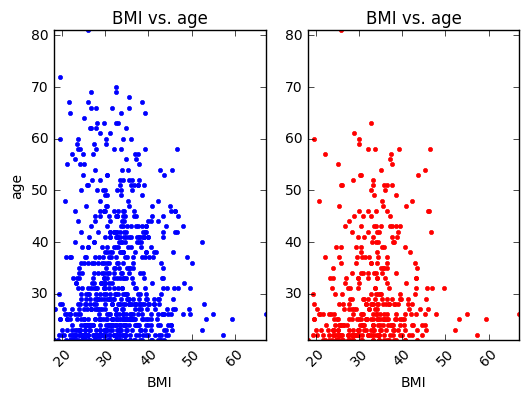

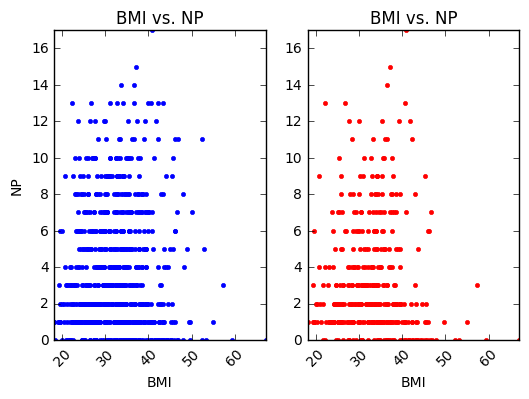

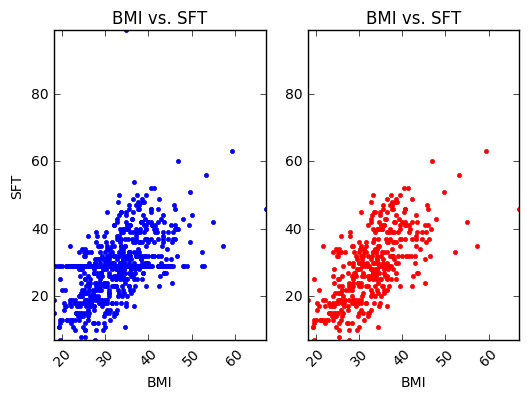

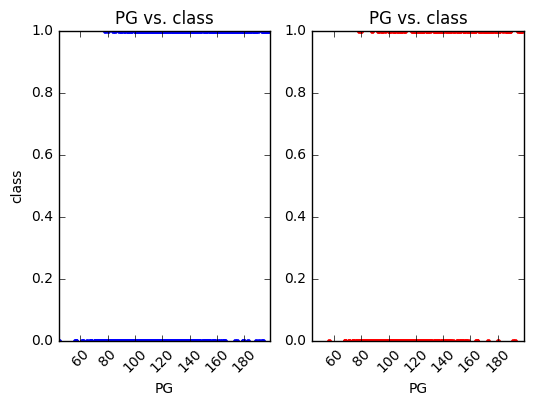

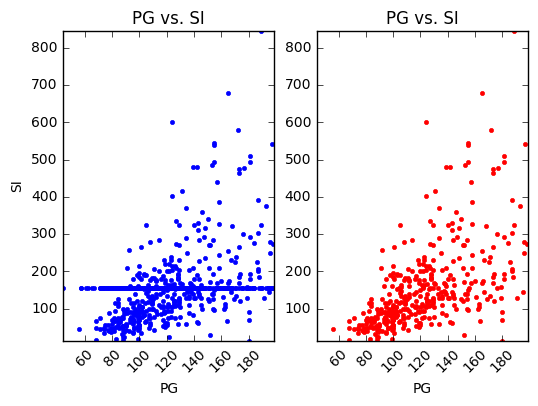

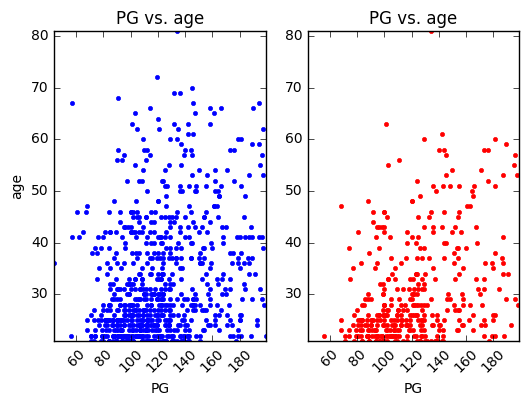

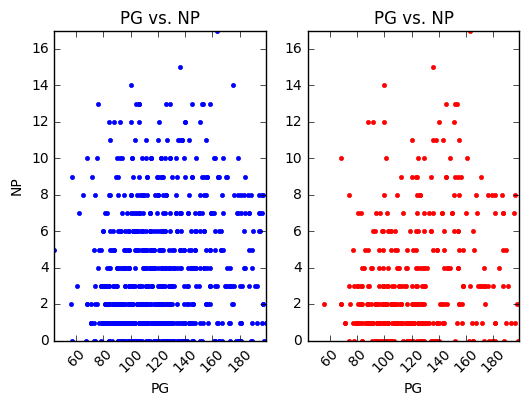

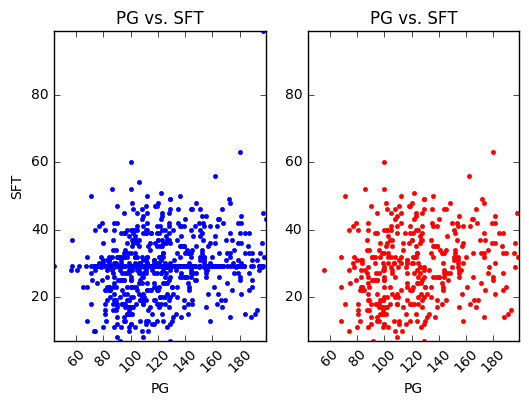

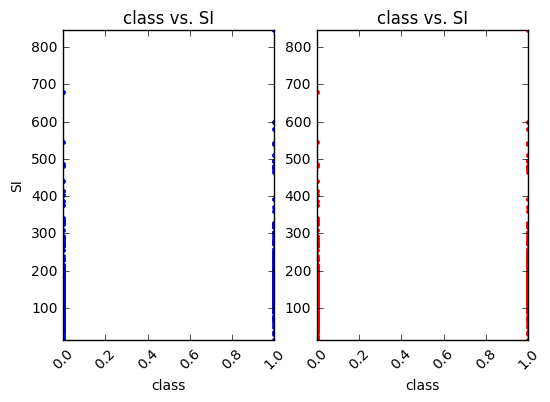

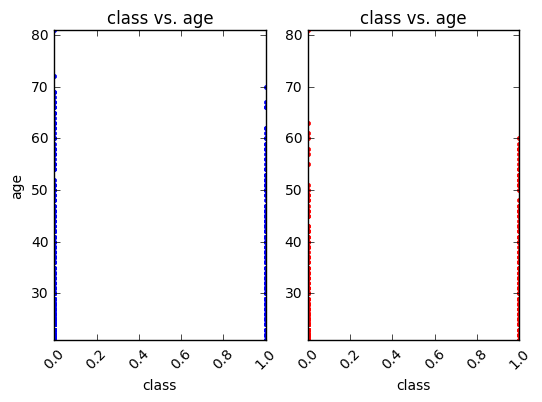

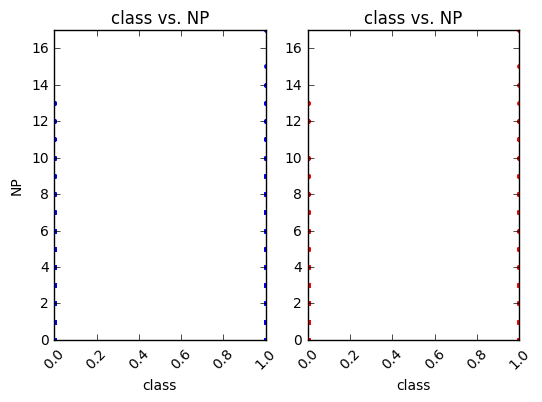

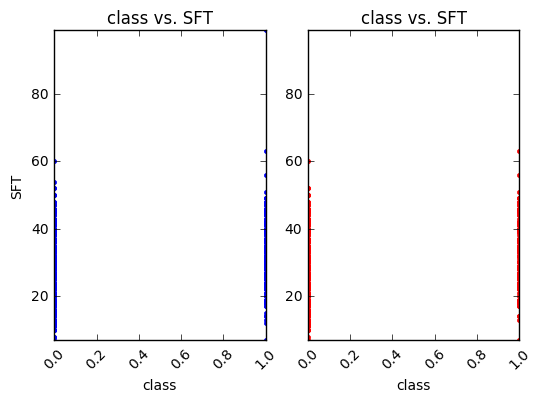

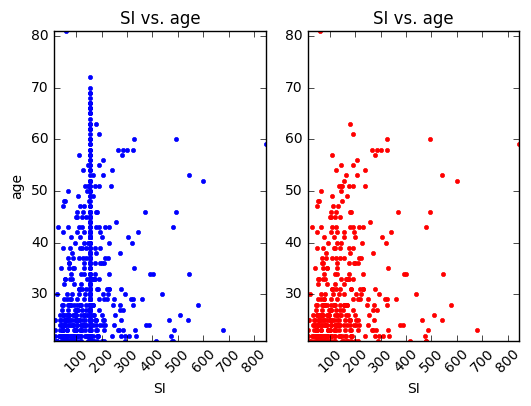

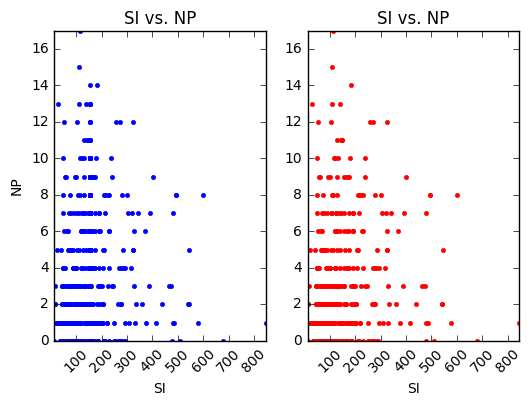

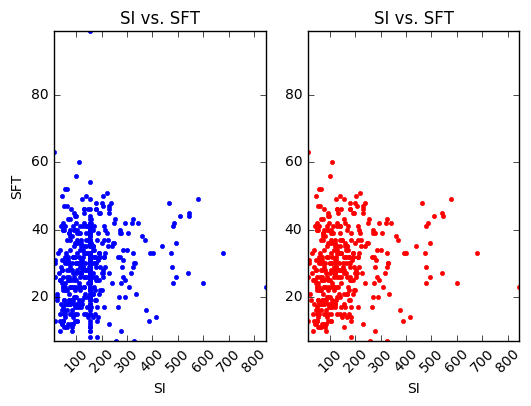

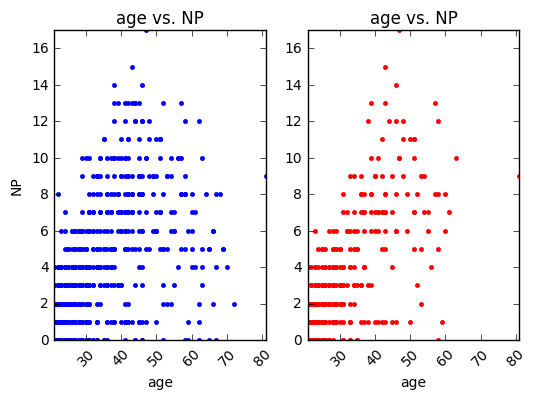

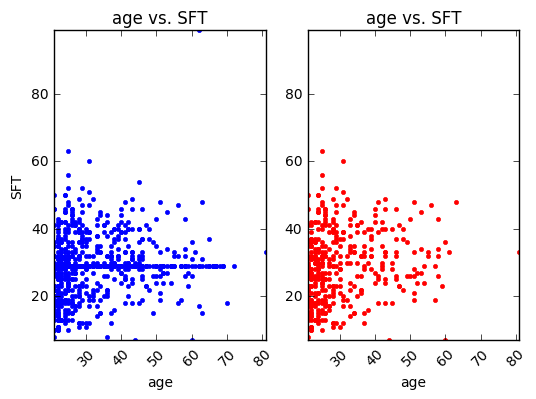

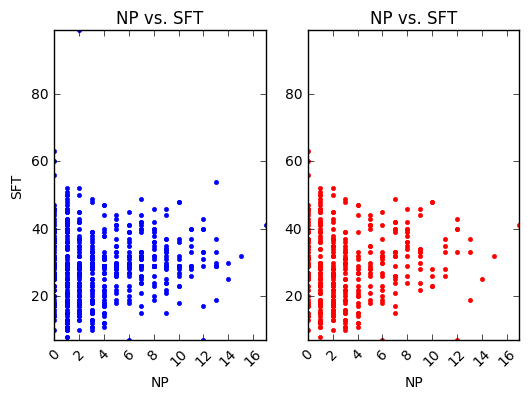

In [292]:
# plot all combinations with different colors of estimated missing data
def Plot_Imputted(data, data_MMI, data_lwd):
    #plt.subplots(14, 2)

    pot_dups = []
    for d1 in data.keys():
        for d2 in data.keys():
            # make sure we don't duplicate a corr coeff calculation by
            # checking for duplicates
            dup_check = []
            dup_check = [set(pd) == set([d1,d2]) for pd in pot_dups]

            # if the two variables are not the same and we haven't calculated the
            # opposite version i.e. a vs. b and b vs a.
            if d1 != d2 and any(dup_check) == False:
                # log the comparisons we've already done
                pot_dups.append([d1, d2])
                
                xmax = max([max(data_MMI[d1]), max(data_lwd[d1])])
                xmin = min([min(data_MMI[d1]), min(data_lwd[d1])])
                ymax = max([max(data_MMI[d2]), max(data_lwd[d2])])
                ymin = min([min(data_MMI[d2]), min(data_lwd[d2])])
                
                fig, axes = plt.subplots(1,2)
                
                axes[0].plot(data_MMI[d1], data_MMI[d2], '.', color = 'blue')
                titleplt = d1+' vs. '+d2
                plt.sca(axes[0])
                plt.title(titleplt)
                axes[0].set_xlabel(d1)
                plt.xticks(rotation=45)
                plt.xlim(xmin, xmax)
                plt.ylim(ymin, ymax)
                axes[0].set_ylabel(d2)
                
                axes[1].plot(data_lwd[d1], data_lwd[d2], '.', color = 'red')
                plt.sca(axes[1])
                plt.xticks(rotation=45)
                plt.ylim(ymin, ymax)
                plt.xlim(xmin, xmax)
                axes[1].set_xlabel(d1)
                plt.title(titleplt)
                plt.show()
                plt.clf()
Plot_Imputted(data_list, MMI_data, list_update_data)

Judging from the the side by side plots it would appear that the data are not MCAR. MCAR means that missing values are missing independent of other variables and the parameters of the distribution they are a part of. Judging from the plots I made earlier it appears that older patients are associated with missing data. Looking at any of the figures with 'age' and comparing the imputed data set with the list wise deletion data we can clearly see that older patients are associated with missing data. This isn't to say that there isn't missing data for younger patients, more to say that or often data is missing for older patients.

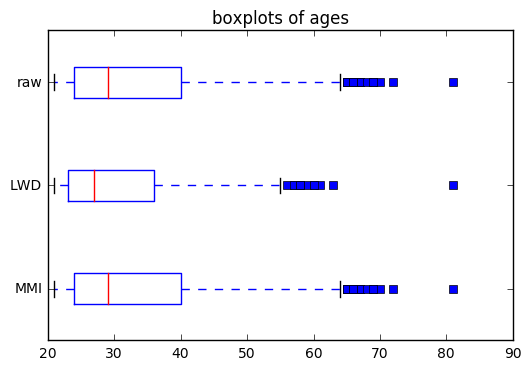

In [309]:
plt.boxplot([data_list['age'], list_update_data['age'], MMI_data['age']], 0, 'rs', 0, labels = ['MMI', 'LWD', 'raw'])
plt.title('boxplots of ages')
plt.show()

The above box plots show how the distribution of ages in the data set change between the different data imputation methods. These comparison plots show that deleting data list wise changes the distribution of ages in the data another indication that the missingness of the data are not MCAR. Finally, if we look at the summary statistics in some earlier tables made the mean age changes by about 3.5 years. Indicating the the pool of patients in the data set have gotten younger after list wise deletion.